<a href="https://colab.research.google.com/github/Jrnlk/Breast-Cancer-AI/blob/main/Cancer_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Cancer With Machine Learning

## Part 1: Fine Needle Aspiration

### Importing Data / Libraries

In [ ]:
# Import Needed Libraries
import numpy as np
import graphviz
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, auc, precision_score, classification_report, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, auc, confusion_matrix
from sklearn.metrics import recall_score
from sklearn import *
from google.colab import drive
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

# Define the file path
file_path = '/content/drive/MyDrive/Cancer Research/Part 1: Fine Needle Aspiration/data.csv'

# Read the data file using pandas
data = pd.read_csv(file_path)

# Display the data
print(data.head())

Mounted at /content/drive
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_wor

### Pre-Processing

#### Check for Missing Data

In [ ]:
# Check for missing data
missing_data = data.isnull().sum()
print(missing_data)

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
# Drop column "Unnamed: 32" and column "ID"
data = data.drop('Unnamed: 32', axis=1)
data = data.drop('id', axis=1)

#### Correlation Heatmap

<ipython-input-6-370d16a8475c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


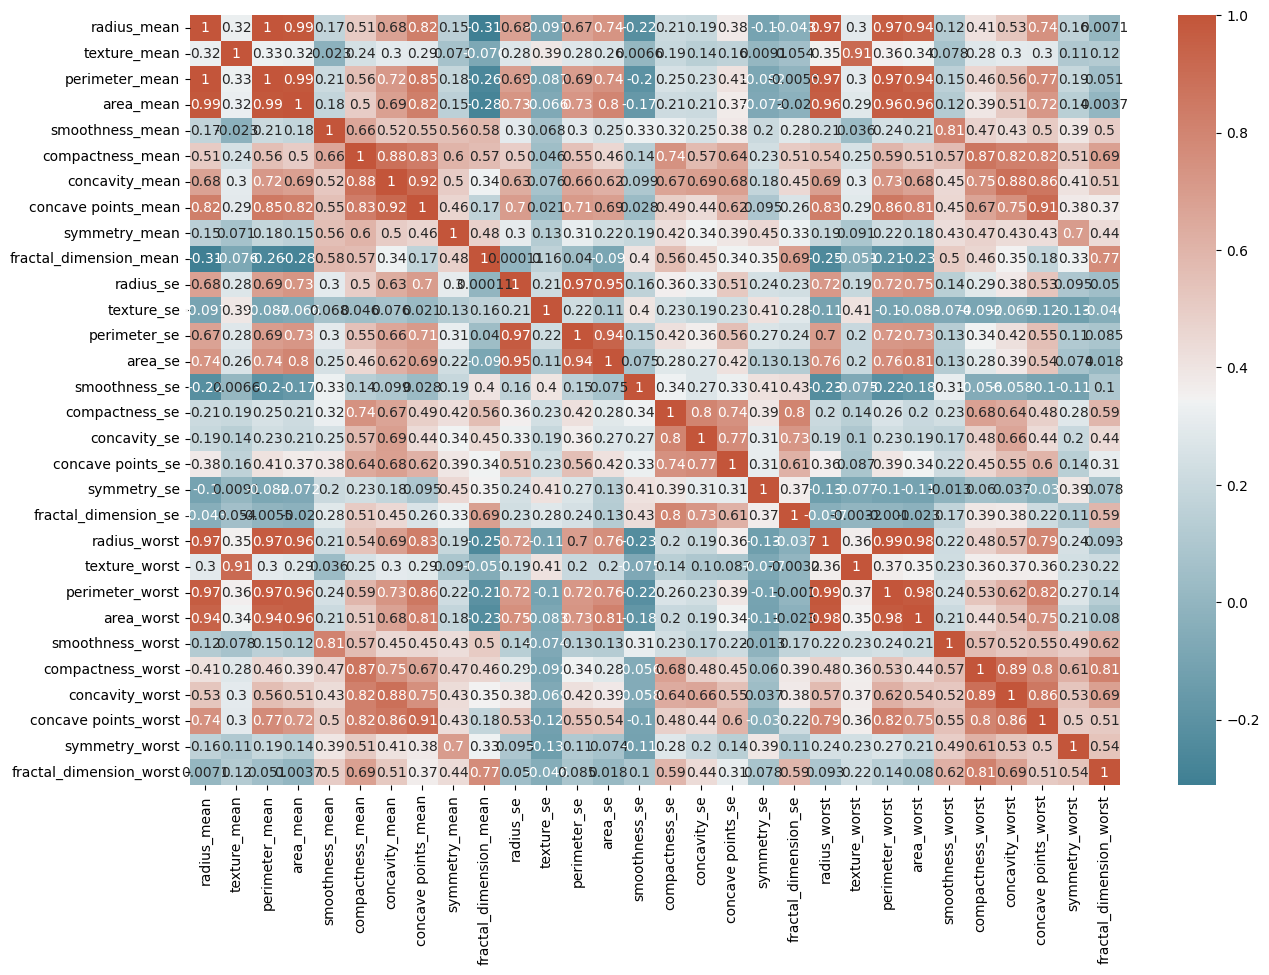

In [ ]:
# Calculate the correlation matrix
corr = data.corr()

# Plot the correlation heatmap
plt.subplots(figsize=(15, 10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

# Display the correlation heatmap
plt.show()

#### Encode Diagnosis to 1 and 0

In [ ]:
# Malignant = 1, Benign = 0

# Map 'M' to 1 and 'B' to 0 in the 'diagnosis' column
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Print the modified 'diagnosis' column
print(data['diagnosis'])

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


#### Data Scaling

In [ ]:
# Extract the relevant numerical attributes for feature scaling
numerical_attributes = data.drop(['diagnosis'], axis=1)

# Apply feature scaling using normalization (MinMaxScaler)
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(numerical_attributes)

# Create a new DataFrame with the scaled features
scaled_data = pd.DataFrame(scaled_features, columns=numerical_attributes.columns)

# Print the scaled data
print(scaled_data.head())

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.521037      0.022658        0.545989   0.363733         0.593753   
1     0.643144      0.272574        0.615783   0.501591         0.289880   
2     0.601496      0.390260        0.595743   0.449417         0.514309   
3     0.210090      0.360839        0.233501   0.102906         0.811321   
4     0.629893      0.156578        0.630986   0.489290         0.430351   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.792037        0.703140             0.731113       0.686364   
1          0.181768        0.203608             0.348757       0.379798   
2          0.431017        0.462512             0.635686       0.509596   
3          0.811361        0.565604             0.522863       0.776263   
4          0.347893        0.463918             0.518390       0.378283   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           

#### Split Diagnosis and Attributes

In [ ]:
# Create the 'attributes' DataFrame containing all columns except 'diagnosis'
attributes = data.drop(columns='diagnosis', axis=1)

# Create the 'diagnosis' Series, which will be used as labels
diagnosis = data['diagnosis']

# Print head of both
print(attributes.head())
print(diagnosis.head())

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           

#### Check How Many Positive and Negative Diagnosises

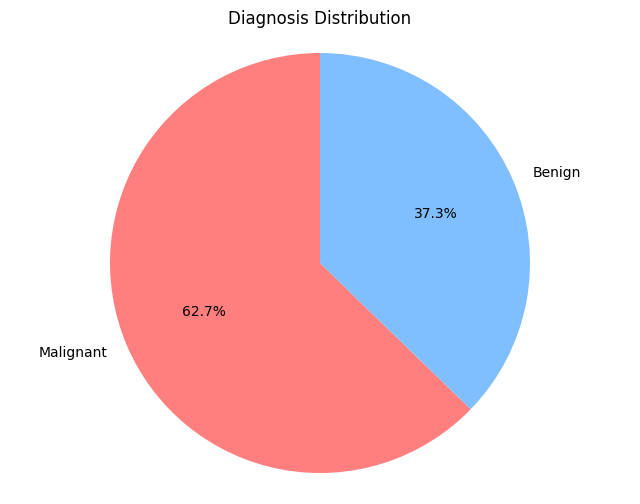

In [ ]:
# Count the number of malignant (1) and benign (0) diagnoses
diagnosis_counts = diagnosis.value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
colors = ['#FF7F7F', '#7FBFFF']  # Custom colors for the pie slices

# Ensure the labels list matches the number of pie slices
labels = ['Malignant', 'Benign'] if len(diagnosis_counts) == 2 else list(diagnosis_counts.index)

plt.pie(diagnosis_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Diagnosis Distribution')

# Set the aspect ratio to be equal for a circular pie chart
plt.axis('equal')

# Display the chart
plt.show()

### Models

#### Split into Training and Testing

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(attributes, diagnosis, test_size=0.2, random_state=42)

#### Run Models

In [ ]:
# Create and train the models

# Import Needed Libraries (some may be redundant)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# Create and train the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier()
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    if hasattr(model, 'predict_proba'):
        proba = model.predict_proba(X_test)[:, 1]  # Get probability estimates
        auc = roc_auc_score(y_test, proba)
    else:
        auc = None

    # Store the results
    results[model_name] = {
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1-score': f1,
        'AUC': auc
    }

# Print the results
for model_name, metrics in results.items():
    print(f'{model_name}:')
    for metric_name, value in metrics.items():
        if metric_name != 'AUC':
            print(f'{metric_name}: {value:.4f}')
        else:
            if value is not None:
                print(f'{metric_name}: {value:.4f}')
            else:
                print(f'{metric_name}: N/A')
    print()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy: 0.9649
Recall: 0.9302
Precision: 0.9756
F1-score: 0.9524
AUC: 0.9971

Decision Tree:
Accuracy: 0.9298
Recall: 0.9070
Precision: 0.9070
F1-score: 0.9070
AUC: 0.9253

Random Forest:
Accuracy: 0.9649
Recall: 0.9302
Precision: 0.9756
F1-score: 0.9524
AUC: 0.9966

Support Vector Machine:
Accuracy: 0.9474
Recall: 0.8605
Precision: 1.0000
F1-score: 0.9250
AUC: 0.9934

Gradient Boosting:
Accuracy: 0.9561
Recall: 0.9302
Precision: 0.9524
F1-score: 0.9412
AUC: 0.9954



#### Soft Ensemble

In [ ]:
# Create the Random Forest and Gradient Boosting models
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()

# Create the ensemble model using soft voting
ensemble_model = VotingClassifier(estimators=[('Random Forest', random_forest), ('Gradient Boosting', gradient_boosting)], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set using the ensemble model
ensemble_predictions = ensemble_model.predict(X_test)
ensemble_probabilities = ensemble_model.predict_proba(X_test)[:, 1]

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
ensemble_precision = precision_score(y_test, ensemble_predictions)
ensemble_recall = recall_score(y_test, ensemble_predictions)
ensemble_f1_score = f1_score(y_test, ensemble_predictions)
ensemble_auc_roc = roc_auc_score(y_test, ensemble_probabilities)

# Print evaluation metrics for the ensemble model
print('Ensemble Model Metrics:')
print(f'Accuracy: {ensemble_accuracy:.4f}')
print(f'Precision: {ensemble_precision:.4f}')
print(f'Recall: {ensemble_recall:.4f}')
print(f'F1-Score: {ensemble_f1_score:.4f}')
print(f'AUC-ROC: {ensemble_auc_roc:.4f}\n')

Ensemble Model Metrics:
Accuracy: 0.9561
Precision: 0.9524
Recall: 0.9302
F1-Score: 0.9412
AUC-ROC: 0.9938



#### Test User Interface Using Random Forest and Gradient Boosting

In [ ]:
import ipywidgets as widgets

# Create and train the models
models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Create dropdown widget for model selection
model_dropdown = widgets.Dropdown(
    options=list(models.keys()),
    description='Model:',
    style={'description_width': 'initial'}
)

# Create text boxes for attribute inputs
attribute_textboxes = {}
for attribute in attributes.columns:
    attribute_textboxes[attribute] = widgets.FloatText(
        description=attribute + ":",
        style={'description_width': 'initial'}
    )

# Create submit button
button = widgets.Button(description='Submit')

def submit_button_clicked(b):
    selected_model = model_dropdown.value
    model = models[selected_model]
    model.fit(attributes, diagnosis)

    user_inputs = {}
    for attribute, textbox in attribute_textboxes.items():
        user_inputs[attribute] = [textbox.value]

    user_data = pd.DataFrame(user_inputs)

    prediction = model.predict(user_data)
    print(f'Prediction: {prediction[0]}')

# Register callback function to the button
button.on_click(submit_button_clicked)

# Create a VBox layout for the widgets with a title
title_widget = widgets.HTML("<h3 style='text-align: center;'>Test User Interface</h3>")
vbox_layout = widgets.VBox([title_widget, model_dropdown] + list(attribute_textboxes.values()) + [button],
                           layout=widgets.Layout(align_items='center'))

# Display the widgets
display(vbox_layout)

###Evaluation

#### Basic Metrics

In [ ]:
# Create the Gradient Boosting, Random Forest, and Soft Ensemble models
gradient_boosting = GradientBoostingClassifier()
random_forest = RandomForestClassifier()
ensemble_model = VotingClassifier(estimators=[('Random Forest', random_forest), ('Gradient Boosting', gradient_boosting)], voting='soft')

# Fit the models
gradient_boosting.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
gb_predictions = gradient_boosting.predict(X_test)
rf_predictions = random_forest.predict(X_test)
ensemble_predictions = ensemble_model.predict(X_test)

# Evaluate the models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
gb_scores = [accuracy_score(y_test, gb_predictions), precision_score(y_test, gb_predictions), recall_score(y_test, gb_predictions),
             f1_score(y_test, gb_predictions), roc_auc_score(y_test, gradient_boosting.predict_proba(X_test)[:, 1])]
rf_scores = [accuracy_score(y_test, rf_predictions), precision_score(y_test, rf_predictions), recall_score(y_test, rf_predictions),
             f1_score(y_test, rf_predictions), roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1])]
ensemble_scores = [accuracy_score(y_test, ensemble_predictions), precision_score(y_test, ensemble_predictions), recall_score(y_test, ensemble_predictions),
                   f1_score(y_test, ensemble_predictions), roc_auc_score(y_test, ensemble_model.predict_proba(X_test)[:, 1])]

df_scores = pd.DataFrame({'Metric': metrics, 'Gradient Boosting': gb_scores, 'Random Forest': rf_scores, 'Soft Ensemble': ensemble_scores})

# Display the DataFrame
df_scores_styled = df_scores.style
df_scores_styled


,Metric,Gradient Boosting,Random Forest,Soft Ensemble
0,Accuracy,0.956140,0.964912,0.956140
1,Precision,0.952381,0.975610,0.952381
2,Recall,0.930233,0.930233,0.930233
3,F1-Score,0.941176,0.952381,0.941176
4,AUC-ROC,0.995087,0.995087,0.996397


#### Confusion Matrix

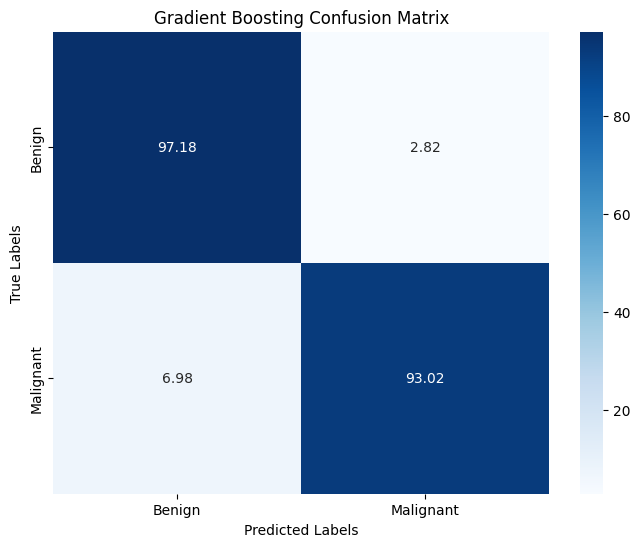

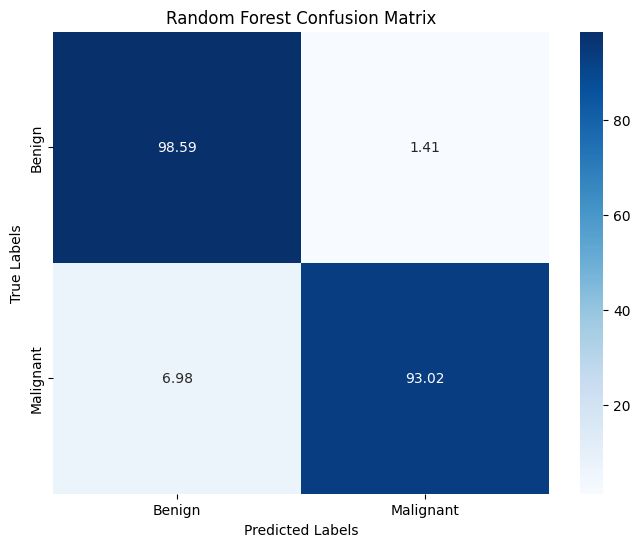

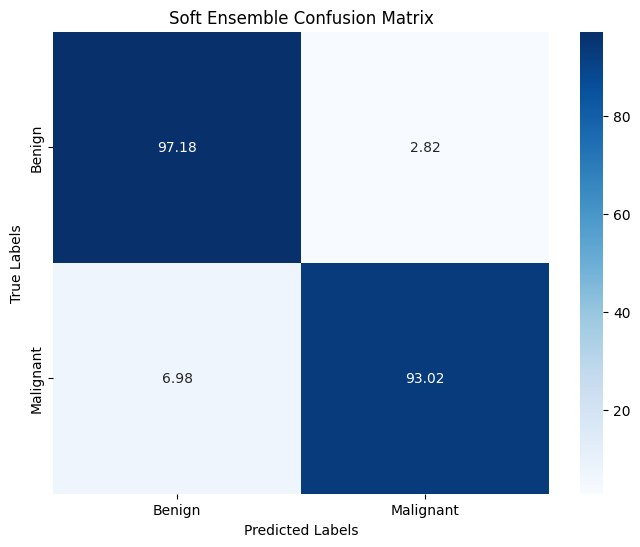

In [ ]:
# Define the true labels and predicted labels for each model
true_labels = y_test
gb_predicted_labels = gb_predictions
rf_predicted_labels = rf_predictions
ensemble_predicted_labels = ensemble_predictions

# Create confusion matrices
gb_cm = confusion_matrix(true_labels, gb_predicted_labels)
rf_cm = confusion_matrix(true_labels, rf_predicted_labels)
ensemble_cm = confusion_matrix(true_labels, ensemble_predicted_labels)

# Function to calculate percentage values in confusion matrix
def calculate_percentages(cm):
    row_sums = cm.sum(axis=1)
    percentages = np.around(cm / row_sums[:, np.newaxis] * 100, decimals=2)
    return percentages

# Function to plot pretty confusion matrix
def plot_confusion_matrix(cm, labels, title):
    percentages = calculate_percentages(cm)

    plt.figure(figsize=(8, 6))
    sns.heatmap(percentages, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

# Define class labels
class_labels = ['Benign', 'Malignant']

# Plot pretty confusion matrices
plot_confusion_matrix(gb_cm, class_labels, 'Gradient Boosting Confusion Matrix')
plot_confusion_matrix(rf_cm, class_labels, 'Random Forest Confusion Matrix')
plot_confusion_matrix(ensemble_cm, class_labels, 'Soft Ensemble Confusion Matrix')

#### ROC Curve

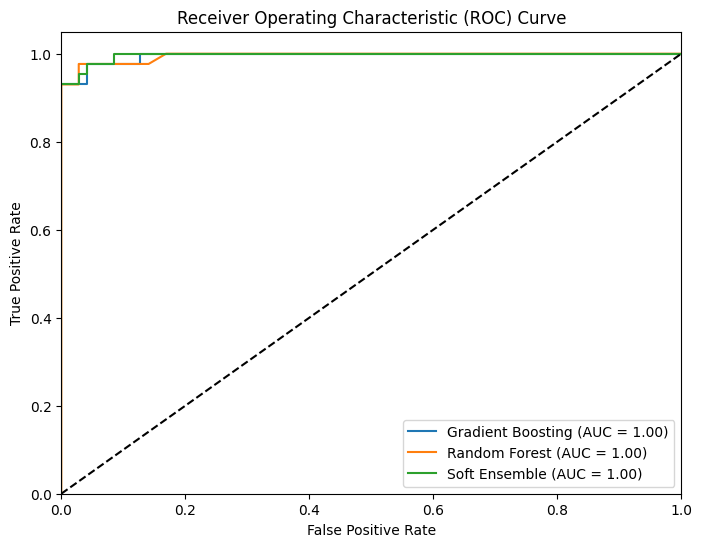

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define the true labels and predicted probabilities for each model
true_labels = y_test
gb_predicted_probs = gradient_boosting.predict_proba(X_test)[:, 1]
rf_predicted_probs = random_forest.predict_proba(X_test)[:, 1]
ensemble_predicted_probs = ensemble_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for each model
gb_fpr, gb_tpr, _ = roc_curve(true_labels, gb_predicted_probs)
gb_auc = auc(gb_fpr, gb_tpr)

rf_fpr, rf_tpr, _ = roc_curve(true_labels, rf_predicted_probs)
rf_auc = auc(rf_fpr, rf_tpr)

ensemble_fpr, ensemble_tpr, _ = roc_curve(true_labels, ensemble_predicted_probs)
ensemble_auc = auc(ensemble_fpr, ensemble_tpr)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(ensemble_fpr, ensemble_tpr, label=f'Soft Ensemble (AUC = {ensemble_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Part 2 CT Scans and CNN

### Import Data

In [ ]:
# Import the required libraries
import os
import pandas as pd

# Define paths to data folders
train_path = '/content/drive/MyDrive/Cancer Research/Part 2: Scans and CNN/train'
valid_path = '/content/drive/MyDrive/Cancer Research/Part 2: Scans and CNN/valid'
test_path = '/content/drive/MyDrive/Cancer Research/Part 2: Scans and CNN/test'

# Function to map folder names to label indices
def map_folder_to_label(folder_name):
    if folder_name == 'normal':
        return 0
    elif folder_name == 'squamous.cell.carcinoma':
        return 1
    elif folder_name == 'large.cell.carcinoma':
        return 2
    elif folder_name == 'adenocarcinoma':
        return 3
    else:
        raise ValueError(f"Unknown folder name: {folder_name}")

# Function to read images and create a data frame
def create_data_frame(data_path):
    data = []  # List to store data rows
    for folder in os.listdir(data_path):
        folder_path = os.path.join(data_path, folder)
        if os.path.isdir(folder_path):  # Check if it's a directory
            label = map_folder_to_label(folder)
            for image_file in os.listdir(folder_path):
                image_path = os.path.join(folder_path, image_file)
                data.append((image_path, label, folder))  # (image_path, diagnosis_label, folder_name)
    return data

# Create data frames for train, valid, and test data
train_data = create_data_frame(train_path)
valid_data = create_data_frame(valid_path)
test_data = create_data_frame(test_path)

# For normal images, label will be 0
normal_train_data = create_data_frame(os.path.join(train_path, 'normal'))
normal_valid_data = create_data_frame(os.path.join(valid_path, 'normal'))
normal_test_data = create_data_frame(os.path.join(test_path, 'normal'))

# Combine the normal and cancer data frames
train_data += normal_train_data
valid_data += normal_valid_data
test_data += normal_test_data

# Create data frames
train_df = pd.DataFrame(train_data, columns=['image_path', 'diagnosis_label', 'folder'])
valid_df = pd.DataFrame(valid_data, columns=['image_path', 'diagnosis_label', 'folder'])
test_df = pd.DataFrame(test_data, columns=['image_path', 'diagnosis_label', 'folder'])

# Shuffle the data frames
train_df = train_df.sample(frac=1).reset_index(drop=True)
valid_df = valid_df.sample(frac=1).reset_index(drop=True)
test_df = test_df.sample(frac=1).reset_index(drop=True)

# Print the number of samples in each data frame
print("Train samples:", len(train_df))
print("Valid samples:", len(valid_df))
print("Test samples:", len(test_df))


Train samples: 613
Valid samples: 72
Test samples: 315


### Data Preprocessing

#### Label Encoding

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Define the mapping of class names to labels
class_mapping = {
    'normal': 0,
    'squamous.cell.carcinoma': 1,
    'large.cell.carcinoma': 2,
    'adenocarcinoma': 3
}

# Map folder names to label indices using the defined mapping
train_df['encoded_labels'] = train_df['folder'].map(class_mapping)
valid_df['encoded_labels'] = valid_df['folder'].map(class_mapping)
test_df['encoded_labels'] = test_df['folder'].map(class_mapping)

# Print the unique classes and their corresponding labels as a table
unique_classes = pd.DataFrame({'Class': class_mapping.keys(), 'Label': class_mapping.values()})
print(unique_classes)

                     Class  Label
0                   normal      0
1  squamous.cell.carcinoma      1
2     large.cell.carcinoma      2
3           adenocarcinoma      3


#### Image Resizing

In [ ]:
# Import necessary libraries
from PIL import Image

# Resize Image to 224 x 224
img_size = (224, 224)

# Function to resize an image
def resize_image(image_path, target_size):
    img = Image.open(image_path)
    img_resized = img.resize(target_size)
    return img_resized

# Apply image resizing to all images in the data frames
train_df['resized_image'] = train_df['image_path'].apply(resize_image, target_size=img_size)
valid_df['resized_image'] = valid_df['image_path'].apply(resize_image, target_size=img_size)
test_df['resized_image'] = test_df['image_path'].apply(resize_image, target_size=img_size)

#### Image Normalization

In [ ]:
import numpy as np

# Function to normalize pixel values of an image (0 to 1)
def normalize_image(image):
    image_array = np.array(image)  # Convert Image object to NumPy array
    return image_array / 255.0

# Apply image normalization to all images in the data frames
train_df['normalized_image'] = train_df['resized_image'].apply(normalize_image)
valid_df['normalized_image'] = valid_df['resized_image'].apply(normalize_image)
test_df['normalized_image'] = test_df['resized_image'].apply(normalize_image)


#### Data Augmentation

In [ ]:
# Import necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create image data generators for train, valid, and test data

# Convert the 'normalized_image' column to file paths (string representation)
# Define a function to save the normalized images as temporary files
def save_temp_image(image_array):
    temp_file = f"/content/temp_image.jpg"  # You can specify a temporary file path here
    image = Image.fromarray(np.uint8(image_array * 255))  # Convert to uint8 and scale to [0, 255]
    image = image.convert('RGB')  # Convert RGBA to RGB mode
    image.save(temp_file)
    return temp_file

train_df['image_path'] = train_df['normalized_image'].apply(save_temp_image)
valid_df['image_path'] = valid_df['normalized_image'].apply(save_temp_image)
test_df['image_path'] = test_df['normalized_image'].apply(save_temp_image)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',  # Use the file paths of the normalized images
    y_col='encoded_labels',
    target_size=img_size,
    batch_size=32,
    class_mode='raw'
)

valid_generator = datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='image_path',  # Use the file paths of the normalized images
    y_col='encoded_labels',
    target_size=img_size,
    batch_size=32,
    class_mode='raw'
)

test_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='image_path',  # Use the file paths of the normalized images
    y_col='encoded_labels',
    target_size=img_size,
    batch_size=32,
    class_mode='raw',
    shuffle=False
)


Found 613 validated image filenames.
Found 72 validated image filenames.
Found 315 validated image filenames.


#### Data Loading

In [ ]:
# Import necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation and normalization for training data
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255
)

# Define normalization for validation and test data
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create image data generators for train, valid, and test data
batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',
    y_col='encoded_labels',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='raw'
)

valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='image_path',
    y_col='encoded_labels',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='raw'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='image_path',
    y_col='encoded_labels',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='raw',
    shuffle=False
)


Found 613 validated image filenames.
Found 72 validated image filenames.
Found 315 validated image filenames.


### The Model

#### Model Building

In [ ]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the input shape (should match your image dimensions and color channels)
input_shape = (img_size[0], img_size[1], 3)  # Assuming RGB color images (3 channels)

# Initialize the CNN model
model = Sequential()

# Add Conv2D and MaxPooling2D layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Add Flatten layer and Dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# Output layer with 4 neurons (for the 4 classes) and 'softmax' activation
model.add(Dense(4, activation='softmax'))

#### New GPT 4 Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))  # Assuming 64x64 images with 3 channels
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(4, activation='softmax'))  # 4 classes hence 4 output neurons with softmax activation

    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

    return model

model = create_model()

In [ ]:
model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

NameError: ignored

#### Compile the Model

In [ ]:
# Define the optimizer, loss function, and metrics
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Model Training

In [ ]:
# Define the number of epochs
epochs = 10

# Train the model using model.fit()
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=epochs,
    verbose=1
)

Epoch 1/10
20/20 [==============================] - 101s 5s/step - loss: 1.4628 - accuracy: 0.2675 - val_loss: 1.4257 - val_accuracy: 0.3194
Epoch 2/10
20/20 [==============================] - 85s 4s/step - loss: 1.3810 - accuracy: 0.3181 - val_loss: 1.3897 - val_accuracy: 0.3194
Epoch 3/10
20/20 [==============================] - 88s 4s/step - loss: 1.3738 - accuracy: 0.3181 - val_loss: 1.3983 - val_accuracy: 0.3194
Epoch 4/10
20/20 [==============================] - 87s 4s/step - loss: 1.3768 - accuracy: 0.3181 - val_loss: 1.4086 - val_accuracy: 0.3194
Epoch 5/10
20/20 [==============================] - 86s 4s/step - loss: 1.3722 - accuracy: 0.3181 - val_loss: 1.3771 - val_accuracy: 0.3194
Epoch 6/10
20/20 [==============================] - 87s 4s/step - loss: 1.3818 - accuracy: 0.3181 - val_loss: 1.4063 - val_accuracy: 0.3194
Epoch 7/10
20/20 [==============================] - 85s 4s/step - loss: 1.3742 - accuracy: 0.3181 - val_loss: 1.3999 - val_accuracy: 0.3194
Epoch 8/10
20/20 [=

### Initial Evaluation + Tuning

#### Printing Metrics

In [ ]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import average_precision_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import jaccard_score

# Evaluate the model on the test set
y_true = test_df['encoded_labels']
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

# Compute metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
roc_auc = roc_auc_score(y_true, y_pred_prob, multi_class='ovr')

# Compute Precision-Recall curve and Mean Average Precision (mAP)
y_true_onehot = np.eye(4)[y_true]  # One-hot encode the true labels
average_precision = average_precision_score(y_true_onehot, y_pred_prob, average='macro')

# Compute Intersection over Union (IoU) - Jaccard Score
iou = jaccard_score(y_true, y_pred, average='macro')

# Print the computed metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC:", roc_auc)
print("Mean Average Precision (mAP):", average_precision)
print("Intersection over Union (IoU):", iou)

10/10 [==============================] - 22s 2s/step
Accuracy: 0.38095238095238093
Precision: 0.09523809523809523
Recall: 0.25
F1 Score: 0.13793103448275862
AUC-ROC: 0.4977456476924022
Mean Average Precision (mAP): 0.2494046821286473
Intersection over Union (IoU): 0.09523809523809523


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Hyperparameter Tuning

##### Finding Hyperparameters

In [ ]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score

# Function to create the CNN model
def create_model(hidden_units=64, optimizer='adam'):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(hidden_units, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier with your model and the required parameters
model_classifier = KerasClassifier(build_fn=create_model, verbose=0)

# Get the total number of samples in your dataset
total_samples = len(train_df)

# Define the number of cross-validation folds
cv_folds = 5  # You can adjust this value based on your preference

# Compute the batch size for each fold
batch_size_per_fold = total_samples // cv_folds

# Define the hyperparameters to tune
param_grid = {
    'hidden_units': [64, 128],
    'batch_size': [batch_size_per_fold],  # Use the computed batch_size_per_fold
    'epochs': [10, 20],
    'optimizer': ['adam', 'sgd']  # Add other hyperparameters to tune
}

# Create a numpy array for the training data and labels
X_train_all = []
y_train_all = []

# Iterate through the train_generator and collect the data and labels
for i in range(len(train_generator)):
    batch_x, batch_y = train_generator[i]
    X_train_all.append(batch_x)
    y_train_all.append(batch_y)

# Concatenate all batches to get the complete training data and labels
X_train_all = np.concatenate(X_train_all, axis=0)
y_train_all = np.concatenate(y_train_all, axis=0)

# Perform GridSearchCV to find the best hyperparameters
grid = GridSearchCV(estimator=model_classifier, param_grid=param_grid, cv=cv_folds, scoring='accuracy')
grid_result = grid.fit(X_train_all, y_train_all)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", grid_result.best_params_)
print("Best Accuracy:", grid_result.best_score_)


<ipython-input-54-068ba79c0deb>:24: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_classifier = KerasClassifier(build_fn=create_model, verbose=0)


4/4 [==============================] - 5s 1s/step


## Part 2: GPT 4 Model Attempt

In [ ]:
# Install necessary packages
!pip install keras-tuner

# Import necessary libraries
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, roc_auc_score
from kerastuner import RandomSearch, HyperModel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 1.6 MB/s eta 0:00:00


<ipython-input-7-885f227aba72>:16: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch, HyperModel


In [ ]:
# Image preprocessing function
def create_data_generators(train_df, valid_df, test_df, target_size=(224, 224), batch_size=32):
    datagen = ImageDataGenerator(
        rescale=1./255, # Normalization
        validation_split=0.2, # Split validation data
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    train_generator = datagen.flow_from_dataframe(
        train_df,
        x_col='image_path',
        y_col='diagnosis_label',
        target_size=target_size,
        class_mode='categorical',
        batch_size=batch_size,
        subset='training'
    )

    valid_generator = datagen.flow_from_dataframe(
        valid_df,
        x_col='image_path',
        y_col='diagnosis_label',
        target_size=target_size,
        class_mode='categorical',
        batch_size=batch_size,
        subset='validation'
    )

    test_datagen = ImageDataGenerator(rescale=1./255) # Only normalization for test set
    test_generator = test_datagen.flow_from_dataframe(
        test_df,
        x_col='image_path',
        y_col='diagnosis_label',
        target_size=target_size,
        class_mode='categorical',
        batch_size=batch_size,
        shuffle=False
    )

    return train_generator, valid_generator, test_generator

In [ ]:
# Define hypermodel for tuning
class CNNHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=self.input_shape)
        x = Flatten()(base_model.output)

        x = Dense(
            units=hp.Int('units', min_value=128, max_value=256, step=64, default=256),
            activation='relu'
        )(x)

        x = Dropout(
            rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1, default=0.3)
        )(x)

        output = Dense(self.num_classes, activation='softmax')(x)

        model = Model(inputs=base_model.input, outputs=output)

        model.compile(
            optimizer=Adam(
                hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG', default=1e-3)
            ),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        return model

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Define the mapping of class names to labels
class_mapping = {
    'normal': 0,
    'squamous.cell.carcinoma': 1,
    'large.cell.carcinoma': 2,
    'adenocarcinoma': 3
}

# Map folder names to label indices using the defined mapping
train_df['encoded_labels'] = train_df['folder'].map(class_mapping)
valid_df['encoded_labels'] = valid_df['folder'].map(class_mapping)
test_df['encoded_labels'] = test_df['folder'].map(class_mapping)

# Print the unique classes and their corresponding labels as a table
unique_classes = pd.DataFrame({'Class': class_mapping.keys(), 'Label': class_mapping.values()})
print(unique_classes)

                     Class  Label
0                   normal      0
1  squamous.cell.carcinoma      1
2     large.cell.carcinoma      2
3           adenocarcinoma      3


In [ ]:
# Import necessary libraries
from PIL import Image

# Resize Image to 224 x 224
img_size = (224, 224)

# Function to resize an image
def resize_image(image_path, target_size):
    img = Image.open(image_path)
    img_resized = img.resize(target_size)
    return img_resized

# Apply image resizing to all images in the data frames
train_df['resized_image'] = train_df['image_path'].apply(resize_image, target_size=img_size)
valid_df['resized_image'] = valid_df['image_path'].apply(resize_image, target_size=img_size)
test_df['resized_image'] = test_df['image_path'].apply(resize_image, target_size=img_size)

In [ ]:
import numpy as np

# Function to normalize pixel values of an image (0 to 1)
def normalize_image(image):
    image_array = np.array(image)  # Convert Image object to NumPy array
    return image_array / 255.0

# Apply image normalization to all images in the data frames
train_df['normalized_image'] = train_df['resized_image'].apply(normalize_image)
valid_df['normalized_image'] = valid_df['resized_image'].apply(normalize_image)
test_df['normalized_image'] = test_df['resized_image'].apply(normalize_image)

In [ ]:
# Import necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation and normalization for training data
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255
)

# Define normalization for validation and test data
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create image data generators for train, valid, and test data
batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',
    y_col='encoded_labels',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='raw'
)

valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='image_path',
    y_col='encoded_labels',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='raw'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='image_path',
    y_col='encoded_labels',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='raw',
    shuffle=False
)

KeyError: ignored